In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

$x \in (0,1)$. The Cauchy problem is:
$$\frac{dy}{dx}=\alpha (x) x+y$$
$$y(0)=1$$
The objective function to minimize is:
$$J(y,\alpha)=\int_{0}^{1} |y-(x+1)e^{x}|^2 dx$$
$\alpha(x)$ is the spatial function to determine.

$y$ is called solution, $f(x) = (x+1)e^{x}$ is the function to generate the observation.

In [23]:
n = 100 ##number of intervals
step = 0.01 ##step size for optimization
max_iter = 10000000
tolerance = 1e-7

The discretized equation can be written into a linear system:
$$AY = B(\alpha*X)+C,$$
where $A$ and $B$ are $n\times n$ matrices, $Y$ is the soloution vector, $X$ is the discretized definition domain, $C$ is a constant vector. * is the Hadamard product. 

$$
A = 
\left[{\begin{array}{cc}
1 & 0 & ...& 0\\
-(n+1) & n & ...& 0\\
0 & (-n+1) & n & ...\\
. & . & ...& .\\
0 & ... & -(n+1) & n\\
\end{array}}\right],
\qquad
B = 
\left[{\begin{array}{cc}
0 & 0 & ...& 0\\
1 & 0 & ...& 0\\
0 & 1 & ...& 0\\
. & . & ...& .\\
0 & ... & 1 & 0\\
\end{array}}\right],
\quad
C = 
\left[{\begin{array}{cc}
1\\
0\\
0\\
.\\
0 \\
\end{array}}\right],
\quad$$

In [13]:
#write the values of A, B, C as well as x
B = np.zeros((n, n))
for i in range(1, n):
    B[i, i-1] = 1.0
    
A = -(n+1) * B + n * np.identity(n)
A[0,0] = 1.0

C = np.zeros(n)
C[0] = 1.0

D = (1-n)*np.identity(n)
for i in range(n-1):
    D[i, i+1] = n

x = np.asarray(range(n))/n

F = (x + 1)*np.exp(x)#the observed data

The lagrangian function is
$$L = J + \int_{0}^{1} z(x)(\frac{dy}{dx}-\alpha (x) x-y) dx.$$

When $z(x)$ satisfies the adjoint equation below, the derivative is
$$\frac{dJ}{d\alpha_i}=-z(x_i)x_i/n, 0\leq i\leq n-1 $$

$x \in (0,1)$. The adjoint equation is:
$$\frac{dz}{dx}+z=2(y-f)$$
$$z(1)=0$$
The discretized equation can be written into a linear system:
$$DZ = 2(Y-F),$$
where $D$ is $n\times n$ matrices, $F$ is the obeserved vector.
$$
D = 
\left[{\begin{array}{cc}
1-n & n & ...& 0\\
0 & 1-n & n...& 0\\
. & . & ...& .\\
0 & ... & 1-n & n\\
0 & ... & &1-n\\
\end{array}}\right],
\quad$$

In [10]:
def J(Y, F):
    h = (Y-F)**2
    
    return np.sum(h / n)

In [7]:
def pde_solver(alpha):
        
    return np.linalg.solve(A, np.dot(B, alpha*x)+C)

def pde_solver_ad(Y):
        
    return np.linalg.solve(D,2*(Y-F))

In [24]:
#intialization
alpha = np.ones(n)
Y = pde_solver(alpha)

#gradient descent
iteration = 0
Err= J(Y, F)
loss = list()
#Y_list = list()
#Y_list.append(Y)
start_time = time.time()

for k in range(10000000):
    loss.append(Err)
    iteration += 1
    Z = pde_solver_ad(Y)
    J_grad_alpha = -Z*x/n
    alpha1 = alpha - step * J_grad_alpha
    Y = pde_solver(alpha1)
    #Y_list.append(Y)

    err = J(Y, F)
    alpha = alpha1
    if (abs(err-Err)/Err < tolerance):
        break
    Err = err

run_time = time.time() - start_time
loss.append(Err)

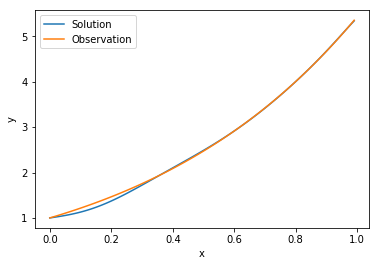

In [25]:
plt.subplot(1, 1, 1)
plt.plot(x, Y, x, F)
plt.xlabel('x')
plt.ylabel('y')

plt.gca().legend(('Solution','Observation'))

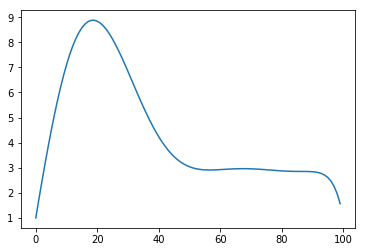

In [29]:
plt.plot(alpha)

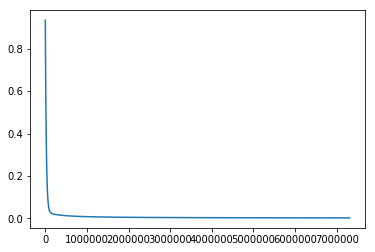

In [30]:
plt.plot(loss)

In [26]:
iteration

7309741

In [27]:
Err

0.0017700406170951472

In [28]:
run_time

2467.7264227867126